In [1]:
import numpy as np
import pandas as pd

In [2]:
with open(u".\spam.csv") as f:
    lines = f.readlines()
X = []
y = []
for line in lines:
    if line[0] == 'h':
        y.append(0)
        string = line[4 : len(line) - 4]
        ss = ''
        for s in string:
            if s == ' ' or (ord(s) >= ord('a') and ord(s) <= ord('z')) or (ord(s) >= ord('A') and ord(s) <= ord('Z')):
                ss += s
        X.append(ss)
    else:
        y.append(1)
        string = line[5 : len(line) - 4]
        ss = ''
        for s in string:
            if s == ' ' or (ord(s) >= ord('a') and ord(s) <= ord('z')) or (ord(s) >= ord('A') and ord(s) <= ord('Z')):
                ss += s
        X.append(ss)
y = np.array(y)
print (y[ : 5])
print (X[2 : 3])
print (len(X), len(y))

[1 0 0 1 0]
['Ok lar Joking wif u oni']
5575 5575


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X)
X_train.shape

(5575, 8605)

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
X_train_tf = tf_transformer.transform(X_train)
X_train_tf.shape
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_train_tfidf.shape

(5575, 8605)

In [5]:
data = X_train_tfidf
print (data[1 : 2])

  (0, 2873)	0.147340012101
  (0, 7841)	0.229602952849
  (0, 3780)	0.325874512281
  (0, 5548)	0.254888633171
  (0, 1567)	0.252371805949
  (0, 491)	0.247805913871
  (0, 5131)	0.156274373462
  (0, 3492)	0.107400040919
  (0, 952)	0.275303151637
  (0, 2969)	0.181385926839
  (0, 8347)	0.224731790993
  (0, 3936)	0.267162980743
  (0, 950)	0.311083337488
  (0, 1284)	0.275303151637
  (0, 7404)	0.161723590189
  (0, 2930)	0.152781639205
  (0, 249)	0.325874512281
  (0, 8093)	0.18581311333


In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = 11)

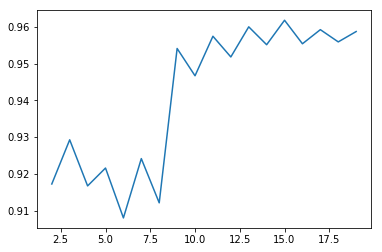

Best k =  15
Best score =  0.961813257165
False positive error =  0.001195457262402869
True negative error =  0.04064554692169755
False negative =  0.9986225895316805
True positive =  0.6923076923076923
TIME =  0:00:00.655037


In [7]:
import time
import datetime
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score
accuracy = []
best_k = 1
best_score = 0
for k in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(len(y_train), random_state=70, n_folds=5,shuffle=True)
    scores = cross_val_score(knn, X_train, y_train, cv=kf)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k
    accuracy.append(scores.mean())
    
plt.plot(np.arange(2, 20), accuracy)
plt.show()

print ("Best k = ", best_k)
print ("Best score = ", best_score)
start_time = datetime.datetime.now()
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)  
y_test_predict = knn.predict(X_test)
fp = 0
tn = 0
fn = 0
tp = 0
f = 0
t = 0
for i in range(len(y_test)):
    if y_test[i] == 0 and y_test_predict[i] == 1:
        fp += 1
        f += 1
    if y_test[i] == 0 and y_test_predict[i] == 0:
        fn += 1
        f += 1
    else:
        if y_test[i] == 1 and y_test_predict[i] == 0:
            tn += 1
            t += 1
        if y_test[i] == 1 and y_test_predict[i] == 1:
            tp += 1
            t += 1
            
print ("False positive error = ", float(fp) / len(y_test))
print ("True negative error = ", float(tn) / len(y_test))
print ("False negative = ", float(fn) / f)
print ("True positive = ", float(tp) / t)
print ("TIME = ", datetime.datetime.now() - start_time)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


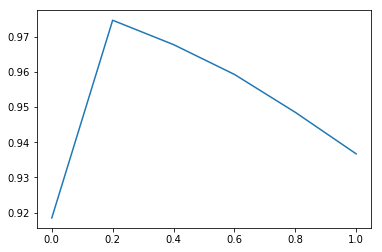

Best C =  0.2
Best score =  0.974629173643
False positive error =  0.010161386730424387
True negative error =  0.016138673042438732
False negative =  0.9882920110192838
True positive =  0.8778280542986425
TIME =  0:00:00.034002


In [8]:
from sklearn.naive_bayes import MultinomialNB
accuracy = []
best_k = 0
best_score = 0
C = [0., 0.2, 0.4, 0.6, 0.8, 1]
for k in C:
    sv = MultinomialNB(alpha=k, class_prior=None, fit_prior=True)
    kf = KFold(len(y_train), random_state=70, n_folds=5,shuffle=True)
    scores = cross_val_score(sv, X_train, y_train, cv=kf)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k
    accuracy.append(scores.mean())
    
plt.plot(C, accuracy)
plt.show()

print ("Best C = ", best_k)
print ("Best score = ", best_score)

start_time = datetime.datetime.now()
clf = MultinomialNB(alpha=best_k, class_prior=None, fit_prior=True)
clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)
fp = 0
tn = 0
fn = 0
tp = 0
f = 0
t = 0
for i in range(len(y_test)):
    if y_test[i] == 0 and y_test_predict[i] == 1:
        fp += 1
        f += 1
    if y_test[i] == 0 and y_test_predict[i] == 0:
        fn += 1
        f += 1
    else:
        if y_test[i] == 1 and y_test_predict[i] == 0:
            tn += 1
            t += 1
        if y_test[i] == 1 and y_test_predict[i] == 1:
            tp += 1
            t += 1
            
print ("False positive error = ", float(fp) / len(y_test))
print ("True negative error = ", float(tn) / len(y_test))
print ("False negative = ", float(fn) / f)
print ("True positive = ", float(tp) / t)
print ("TIME = ", datetime.datetime.now() - start_time)

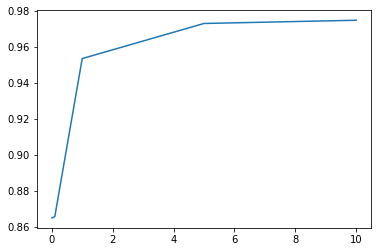

Best C =  10
Best score (l2 penalty) =  0.974629501953


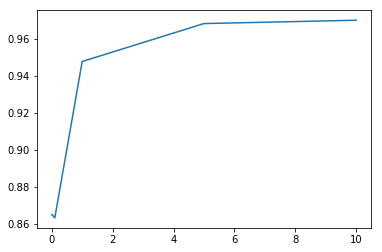

Best C =  10
Best score (l1 penalty) =  0.97001674382
False positive error =  0.0
True negative error =  0.024506873879258817
False negative =  1.0
True positive =  0.8144796380090498
TIME =  0:00:00.160009


In [9]:
from sklearn.linear_model import LogisticRegression
accuracy = []
best_k = 1
best_score = 0
C = [0.001, 0.001, 0.01, 0.1, 1, 5, 10]
for k in C:
    lr = LogisticRegression(C=k)
    kf = KFold(len(y_train), random_state=70, n_folds=5,shuffle=True)
    scores = cross_val_score(lr, X_train, y_train, cv=kf)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k
    accuracy.append(scores.mean())
    
plt.plot(C, accuracy)
plt.show()
print ("Best C = ", best_k)
print ("Best score (l2 penalty) = ", best_score)


accuracy = []
best_k = 1
best_score = 0
C = [0.001, 0.001, 0.01, 0.1, 1, 5, 10]
for k in C:
    lr = LogisticRegression(C=k, penalty="l1")
    kf = KFold(len(y_train), random_state=70, n_folds=5,shuffle=True)
    scores = cross_val_score(lr, X_train, y_train, cv=kf)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k
    accuracy.append(scores.mean())
    
plt.plot(C, accuracy)
plt.show()

print ("Best C = ", best_k)
print ("Best score (l1 penalty) = ", best_score)
start_time = datetime.datetime.now()
lr = LogisticRegression(C=best_k)
lr.fit(X_train, y_train)  
y_test_predict = lr.predict(X_test)
fp = 0
tn = 0
fn = 0
tp = 0
f = 0
t = 0
for i in range(len(y_test)):
    if y_test[i] == 0 and y_test_predict[i] == 1:
        fp += 1
        f += 1
    if y_test[i] == 0 and y_test_predict[i] == 0:
        fn += 1
        f += 1
    else:
        if y_test[i] == 1 and y_test_predict[i] == 0:
            tn += 1
            t += 1
        if y_test[i] == 1 and y_test_predict[i] == 1:
            tp += 1
            t += 1
            
print ("False positive error = ", float(fp) / len(y_test))
print ("True negative error = ", float(tn) / len(y_test))
print ("False negative = ", float(fn) / f)
print ("True positive = ", float(tp) / t)
print ("TIME = ", datetime.datetime.now() - start_time)

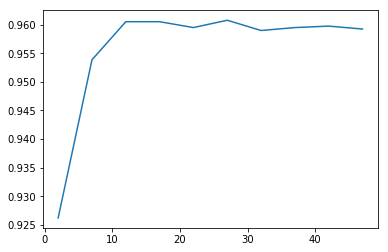

Best C =  27
Best score (best splitter) =  0.96078761614
False positive error =  0.0005977286312014345
True negative error =  0.020322773460848775
False negative =  0.9993112947658402
True positive =  0.8461538461538461
TIME =  10:57:21.144483


In [13]:
from sklearn.tree import DecisionTreeClassifier
accuracy = []
best_k = 1
best_score = 0
C = np.arange(2, 50, 5)
for k in C:
    tree = DecisionTreeClassifier(max_depth=k)
    kf = KFold(len(y_train), random_state=70, n_folds=5,shuffle=True)
    scores = cross_val_score(tree, X_train, y_train, cv=kf)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k
    accuracy.append(scores.mean())
    
plt.plot(C, accuracy)
plt.show()

print ("Best C = ", best_k)
print ("Best score (best splitter) = ", best_score)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
fp = 0
tn = 0
fn = 0
tp = 0
f = 0
t = 0
for i in range(len(y_test)):
    if y_test[i] == 0 and y_test_predict[i] == 1:
        fp += 1
        f += 1
    if y_test[i] == 0 and y_test_predict[i] == 0:
        fn += 1
        f += 1
    else:
        if y_test[i] == 1 and y_test_predict[i] == 0:
            tn += 1
            t += 1
        if y_test[i] == 1 and y_test_predict[i] == 1:
            tp += 1
            t += 1
            
print ("False positive error = ", float(fp) / len(y_test))
print ("True negative error = ", float(tn) / len(y_test))
print ("False negative = ", float(fn) / f)
print ("True positive = ", float(tp) / t)
print ("TIME = ", datetime.datetime.now() - start_time)

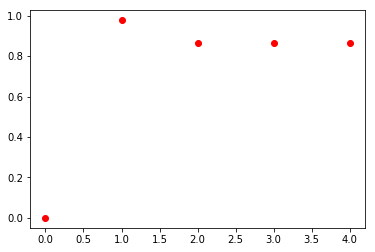

[0, 0.97744804491283366, 0.86493811352966288, 0.86493811352966288, 0.86493811352966288]
['linear', 'poly', 'rbf', 'sigmoid']
Best kernel =  linear
Best score =  0.977448044913
False positive error =  0.0005977286312014345
True negative error =  0.020322773460848775
False negative =  0.9993112947658402
True positive =  0.8461538461538461
TIME =  0:00:01.592091


In [11]:
from sklearn.svm import SVC
svc = SVC()
accuracy = []
best_k = ""
best_score = 0
C = ["linear", "poly", "rbf", "sigmoid"]
for k in C:
    sv = SVC(kernel=k)
    kf = KFold(len(y_train), random_state=70, n_folds=5,shuffle=True)
    scores = cross_val_score(sv, X_train, y_train, cv=kf)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k
    accuracy.append(scores.mean())

accuracy.insert(0, 0)    
plt.plot(np.arange(len(C) + 1), accuracy, 'ro')
plt.show()

print (accuracy)
print (C)
print ("Best kernel = ", best_k)
print ("Best score = ", best_score)

start_time = datetime.datetime.now()
sv = SVC(kernel=best_k)
sv.fit(X_train, y_train)  
y_test_predict = sv.predict(X_test)
fp = 0
tn = 0
fn = 0
tp = 0
f = 0
t = 0
for i in range(len(y_test)):
    if y_test[i] == 0 and y_test_predict[i] == 1:
        fp += 1
        f += 1
    if y_test[i] == 0 and y_test_predict[i] == 0:
        fn += 1
        f += 1
    else:
        if y_test[i] == 1 and y_test_predict[i] == 0:
            tn += 1
            t += 1
        if y_test[i] == 1 and y_test_predict[i] == 1:
            tp += 1
            t += 1
            
print ("False positive error = ", float(fp) / len(y_test))
print ("True negative error = ", float(tn) / len(y_test))
print ("False negative = ", float(fn) / f)
print ("True positive = ", float(tp) / t)
print ("TIME = ", datetime.datetime.now() - start_time)